# Regresión lineal simple (una variable dependiente y una variable explicativa)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Lectura de base de datos y ajuste del tipo de valor por columna

In [2]:
#Lectura de base de datos
M = pd.read_csv("C:\\Users\\ricardo\\Desktop\\PropedeuticoCienciaDeDatos\\Bases\\RegresionLinealSimple2-5.csv",dtype='str',encoding = "ISO-8859-1")

In [3]:
M.head(2)

,X,Y
0,2,-9.910487326
1,4,-7.197660931


In [4]:
#Ajuste de formato de columnas
M["X"] = M["X"].astype(float)
M["Y"] = M["Y"].astype(float)
M.head()

,X,Y
0,2.0,-9.910487
1,4.0,-7.197661
2,6.0,22.737312
3,8.0,50.373510
4,10.0,8.505899


In [5]:
x = M["X"].values.tolist()
y = M["Y"].values.tolist()

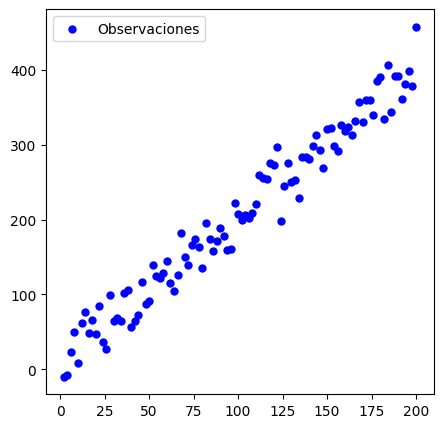

In [6]:
#Gráfica de observaciones
fig = plt.figure(figsize=(5.,5.))
ax = fig.add_subplot(1,1,1)
plt.scatter(x,y,color="blue",s=25,label="Observaciones")
plt.legend(loc='best')
plt.show()

In [7]:
#Función auxiliar
xejemp = [1,3,7]
yejemp = [2,-1,3]
r = np.dot(xejemp,yejemp)
print(r)
print( (1)*(2) + (3)*(-1) + (7)*(3) )

20
20


# Función para el cálculo de los coeficientes de la regresión lineal

In [8]:
#Función para el cálculo de los coeficientes de la regresión lineal
def RLS(x,y):
    n = len(y)
    m = (-np.dot(x,y) + float(n)*np.mean(y)*np.mean(x))/(-np.dot(x,x) + n*(np.mean(x)**2.))
    b = np.mean(y) - m*np.mean(x)
    #Definición del vector de valores estimados y de residuales
    ye = []
    e = []
    for i in range(n):
        ye.extend([m*x[i] + b])
        #ye.append(m*x[i] + b)
        e.extend([y[i]-ye[i]])
    return [m,b,ye,e]
[m,b,ye,e] = RLS(x,y)

In [9]:
#Impresión de pendiente y ordenada al origen
print("La pendiente estimada es",m)
print("La ordenda al origen estimada es",b)

La pendiente estimada es 1.9620420568904169
La ordenda al origen estimada es 9.483643256247888


In [10]:
#Creación de base con la aproximación y residuales
MRL = M.copy(deep=True).reset_index(drop=True)
MRL["Y_Est"] = ye
MRL["Residuales"] = e
MRL.head()

,X,Y,Y_Est,Residuales
0,2.0,-9.910487,13.407727,-23.318215
1,4.0,-7.197661,17.331811,-24.529472
2,6.0,22.737312,21.255896,1.481416
3,8.0,50.373510,25.179980,25.193531
4,10.0,8.505899,29.104064,-20.598165


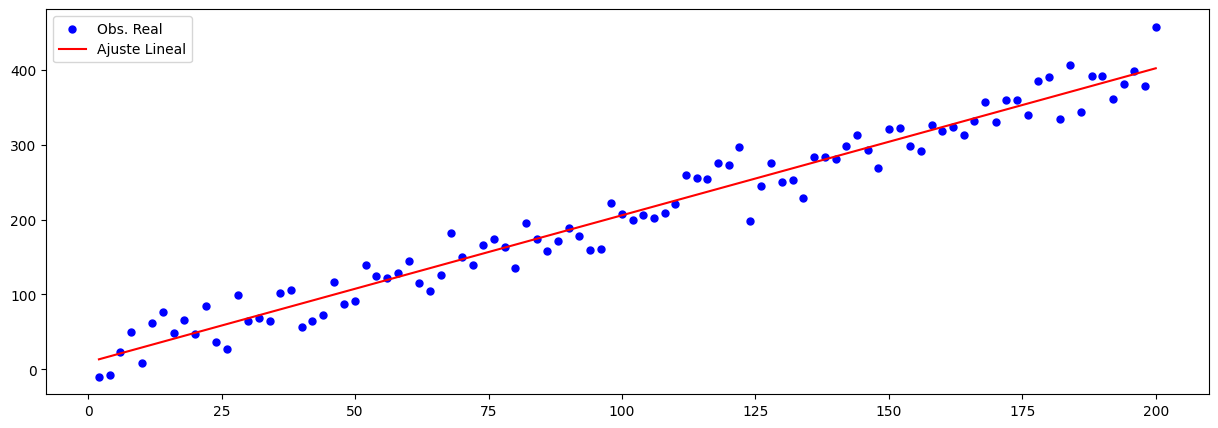

In [11]:
#Gráfica (Regresión Lineal)
fig = plt.figure(figsize=(15.,5.))
ax = fig.add_subplot(1,1,1)
plt.scatter(x,y,color="blue",s=25,label="Obs. Real")
plt.plot(x,ye,color="red",linewidth=1.5,label="Ajuste Lineal")
plt.legend(loc='best')
plt.show()

In [ ]:
M.head(1)

In [ ]:
M.tail()

In [ ]:
#Qué pasaría si x = 202
# y = m*x + b


In [ ]:
m

In [ ]:
b

In [ ]:
#y = m*202 + b
#print("Esperamos que y sea igual a",y,"cuando x es igual a",202)

In [ ]:
#Histograma sin suavizamiento de Kernel
from math import log
fig = plt.figure(figsize=(10.,5.))
ax = fig.add_subplot(1,1,1)
ax.set_title("Histograma residuales")
plt.hist(e, bins = 12,histtype="bar",rwidth=0.9,color="blue")
plt.show()

# Otras paqueterías para realizar una regresión lineal

In [13]:
#Regresión lineal con la librería statsmodels #pip install statsmodels
import statsmodels.api as sm
est = sm.OLS(y, sm.add_constant(x))
est2 = est.fit()
print(est2.params)
print(est2.summary())

[9.48364326 1.96204206]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     2592.
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           2.68e-72
Time:                        10:18:02   Log-Likelihood:                -451.12
No. Observations:                 100   AIC:                             906.2
Df Residuals:                      98   BIC:                             911.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4836      4

In [14]:
#Observación dimensionar un objeto array 
vec = [1,5,-7]
veca = np.asarray(vec)
vecar_1 = veca.reshape(1,3) 
vecar_2 = veca.reshape(-1,1) #El valor es inferido con base en la dimensión del vector
print(vec)
print(veca)
print(vecar_1)
print(vecar_2)

[1, 5, -7]
[ 1  5 -7]
[[ 1  5 -7]]
[[ 1]
 [ 5]
 [-7]]


In [15]:
#Regresión lineal con la librería #install -U scikit-learn
from sklearn.linear_model import LinearRegression
xa = np.asarray(x)
ya = np.asarray(y)
lin_reg = LinearRegression()
lin_reg.fit(xa.reshape(-1,1),ya.reshape(-1,1))
xa = np.array(x)
print(lin_reg.intercept_)
print(lin_reg.coef_)

[9.48364326]
[[1.96204206]]


# Ejercicio 1. El archivo EstaturaBebe.csv contiene la edad en meses y la estatura en centímetros de un bebé hasta un año edad. Utilizando una regresión lineal, estimar la estatura de un bebé de 13 meses.

# Ejercicio 2. Cargar el archivo "TransformacionRegresionLineal.csv", a partir de la gráfica de dispersión proponer una transformación de la variable X para poder ajustar una regresión lineal.